In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from NilsPodLib import session as sensor
from datetime import datetime, timedelta

In [149]:
plt.close('all')

sensor_id = "C960"
date = "20190405_1406"
folder_path = "./Data/Team_ArneRobert/"
file_name = "NilsPodX-%s_%s.bin" % (sensor_id, date)

utc_offset = 2 * 3600

file_path = folder_path + file_name
file_path

'./Data/Team_ArneRobert/NilsPodX-C960_20190405_1406.bin'

In [144]:
dataset = sensor.Dataset(file_path)
# Dataset.calibrate();

Header Size = 29


Start: 2019-04-05 14:06:26
Stop: 2019-04-05 15:04:11
Sampling Frequency calculated: 204.76854256854256 Hz


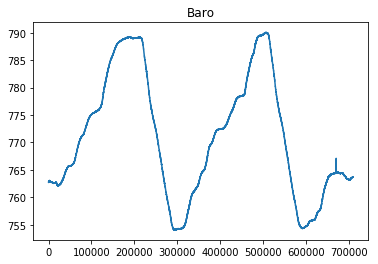

In [150]:
seconds = dataset.header.unix_time_stop - dataset.header.unix_time_start
n = len(dataset.counter)
if seconds > 0:
    print("Start: " + str(dataset.header.datetime_start))
    print("Stop: " + str(dataset.header.datetime_stop))
    print("Sampling Frequency calculated: " + str(1 / (seconds / n)) + " Hz")
else:
    print("Timestamp Error")

if dataset.header.baro_enabled:
    plt.figure()
    plt.plot(dataset.baro.data[1:])
    plt.title('Baro')

In [148]:
# convert to SI units (according to datasheet)
nilspod_data = pd.DataFrame(dataset.acc.data / 2048.0 * 9.80665, columns=['acc_' + x for x in ['x', 'y', 'z']])
gyro_data = pd.DataFrame(dataset.gyro.data / 16.4, columns=['gyro_' + x for x in ['x', 'y', 'z']])
baro_data = pd.DataFrame(dataset.baro.data, columns=['baro'])

nilspod_data = pd.concat([nilspod_data, gyro_data, baro_data], axis=1)

time_received_ms = np.array(dataset.counter / 204.8 * 1000).astype(int)
nilspod_data.insert(0, 'time_received_ms', time_received_ms)
nilspod_data.insert(0, 'time_received_debug', [datetime.utcfromtimestamp(ts + utc_offset).strftime('%H:%M:%S') for ts in dataset.rtc])

#skip 1st sample and reindex the data
nilspod_data = nilspod_data[1:].reset_index(drop=True)
nilspod_data.insert(2, 'sample_ctr', nilspod_data.index)

#today = datetime.now()
#today_morning = datetime.strptime(today.strftime("%Y%m%d") + "000000", "%Y%m%d%H%M%S")
#nilspod_data.insert(0, 'time_received_debug', [today_morning + timedelta(milliseconds=int(ts)) for ts in time_received_ms])

nilspod_data

,time_received_debug,time_received_ms,sample_ctr,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,baro
0,14:06:26,43415751,0,9.126697,-0.138864,0.833182,1.158537,-5.121951,-2.743902,762.75
1,14:06:26,43415756,1,9.064447,-0.320823,-0.028730,0.304878,-5.365854,-3.292683,762.75
2,14:06:26,43415761,2,9.050082,-0.368707,-0.435745,0.182927,-5.365854,-2.804878,762.75
3,14:06:26,43415766,3,9.006987,-0.397437,-0.861913,0.365854,-4.573171,-3.170732,762.75
4,14:06:26,43415771,4,9.074024,-0.435745,-1.139640,0.487805,-4.512195,-2.987805,762.75
5,14:06:26,43415776,5,9.097966,-0.383072,-1.063026,0.792683,-3.475610,-3.658537,762.75
6,14:06:26,43415781,6,9.112332,-0.378284,-0.842759,0.548780,-3.231707,-3.597561,762.75
7,14:06:26,43415786,7,9.088390,-0.292093,-0.679953,0.426829,-2.560976,-3.597561,762.75
8,14:06:26,43415791,8,9.102755,-0.363919,-0.368707,-0.304878,-1.768293,-3.658537,762.75
9,14:06:26,43415795,9,9.069236,-0.354342,0.201113,-0.731707,-1.890244,-4.024390,762.75


In [137]:
nilspod_data.to_csv(file_path[:-3] + ".csv", index=False)